<a href="https://colab.research.google.com/github/shreyanshrao/spam/blob/main/spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np


In [2]:
import pandas as pd
import numpy as np

# Try reading the CSV file with a different encoding
try:
    df = pd.read_csv('spam.csv', encoding='latin-1')
except UnicodeDecodeError:
    # If latin-1 doesn't work, you might need to try other encodings.
    # Common alternatives include 'ISO-8859-1'.
    # For this example, we'll assume latin-1 works based on the common cause of this error.
    print("UnicodeDecodeError with latin-1. Try another encoding like 'ISO-8859-1'.")
    # df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

# Display the first few rows of the dataframe to confirm it was read correctly
print(df.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2263,spam,Not heard from U4 a while. Call 4 rude chat pr...,NaN,NaN,NaN
4772,ham,Ok then u tell me wat time u coming later lor.,NaN,NaN,NaN
1569,ham,I dont have that much image in class.,NaN,NaN,NaN
1849,ham,You got job in wipro:)you will get every thing...,NaN,NaN,NaN
5379,ham,Somebody set up a website where you can play h...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
 df['target']=encoder.fit_transform(df['target']) #assign ham as 0 and spam as 1

In [10]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.isnull().sum()

,0
target,0
text,0


In [12]:
df.duplicated().sum()

np.int64(403)

In [13]:
df=df.drop_duplicates(keep='first')

In [14]:
df.shape

(5169, 2)

In [15]:
df['target'].value_counts()

,count
target,
0,4516
1,653


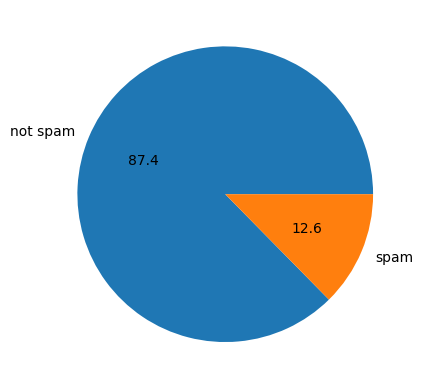

In [16]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['not spam','spam'],autopct="%0.1f")
plt.show()

In [17]:
import nltk

In [18]:
pip install nltk

In [19]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [20]:
df['words']=df['text'].apply(len)   #no. of characters in a line

In [21]:
# Download the punkt_tab resource
nltk.download('punkt_tab')

# Now try applying the word tokenization
df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,text
0,24
1,8
2,37
3,13
4,15
...,...
5567,35
5568,9
5569,15
5570,27


In [22]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [23]:
df.head()

,target,text,words,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [24]:
df['num_sent']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [25]:
df.head()

,target,text,words,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [26]:
df[df['target']==0][['words','num_words','num_sent']].describe()

,words,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
df[df['target']==1][['words','num_words','num_sent']].describe()

,words,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


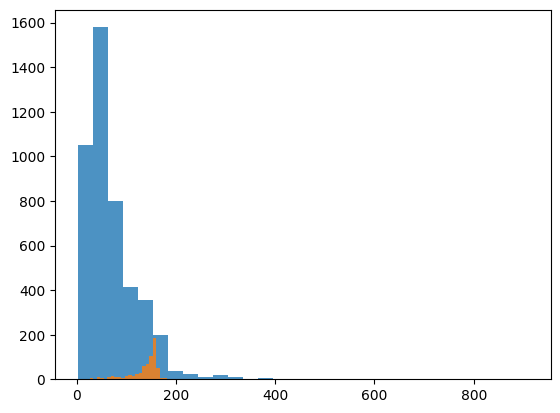

In [28]:
plt.hist(df[df['target']==0]['words'],bins=30,alpha=0.8,label='not spam')
plt.hist(df[df['target']==1]['words'],bins=30,alpha=0.8,label='spam')
plt.show()

In [29]:
import seaborn as sns

<Axes: xlabel='words', ylabel='Count'>

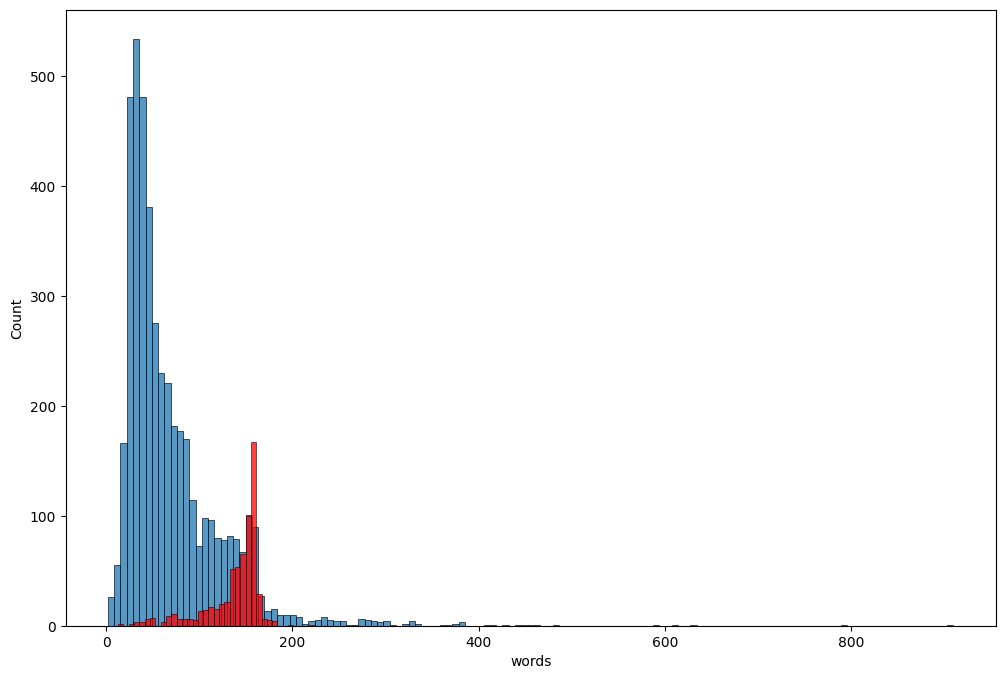

In [30]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['words'])
sns.histplot(df[df['target']==1]['words'], color='red')

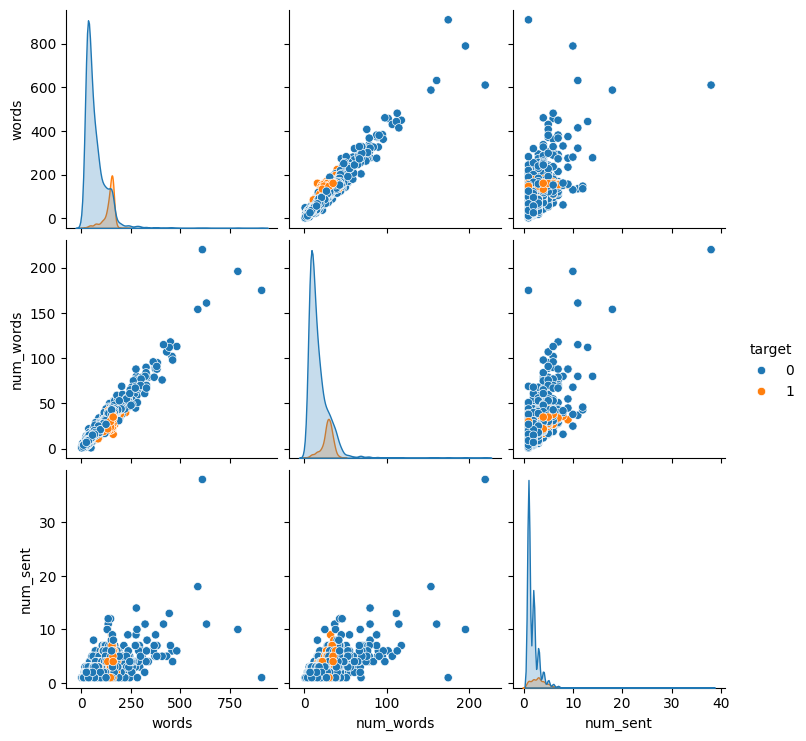

In [31]:
sns.pairplot(df,hue='target')

<Axes: >

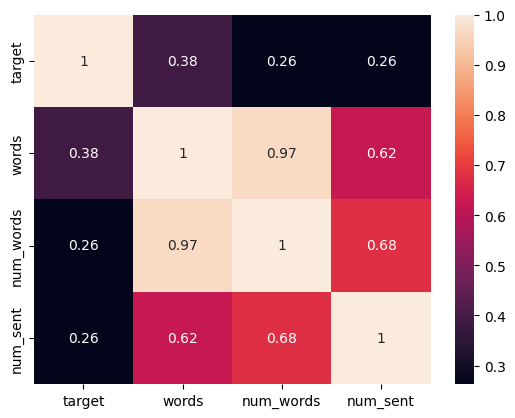

In [32]:
# Calculate correlation, excluding non-numeric columns
sns.heatmap(df.corr(numeric_only=True),annot=True)

lower case,
tokenization ,
remove special characters,
stemming

In [ ]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [72]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y) # Join the list of words into a single string

In [73]:
df['transformed_text'] = df['text'].apply(transform_text)

In [75]:
df.head()

,target,text,words,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [79]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [80]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

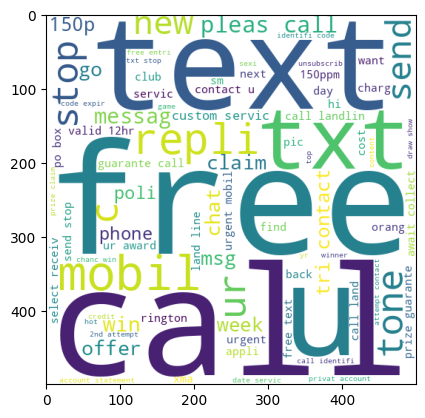

In [81]:
plt.imshow(spam_wc)
plt.show()